<img src="../../../imgs/CampQMIND_banner.png">

# Random Forest

This notebook is intended to provide a short introduction to random forests.

Author: [Umur Gokalp](https://github.com/uGokalp)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Learning Outcomes</a></span></li><li><span><a href="#High-Variance-Problem" data-toc-modified-id="High-Variance-Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>High Variance Problem</a></span><ul class="toc-item"><li><span><a href="#Videos" data-toc-modified-id="Videos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Videos</a></span></li></ul></li><li><span><a href="#Bagging-(Bootstrap-Aggregation)" data-toc-modified-id="Bagging-(Bootstrap-Aggregation)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bagging (Bootstrap Aggregation)</a></span></li><li><span><a href="#Random-Subspace-Method" data-toc-modified-id="Random-Subspace-Method-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Subspace Method</a></span></li><li><span><a href="#Out-of-Bag-Error-(OOB)" data-toc-modified-id="Out-of-Bag-Error-(OOB)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Out of Bag Error (OOB)</a></span></li><li><span><a href="#Implementation-in-Scikit-learn" data-toc-modified-id="Implementation-in-Scikit-learn-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Implementation in Scikit-learn</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

![image.png](https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/random-forest.png?resize=602%2C344&ssl=1)

# High Variance Problem

Variance in machine learning models is defined as the "sensitivity to small fluctuations in the training dataset".[[1]](https://www.mitpressjournals.org/doi/abs/10.1162/neco.1992.4.1.1)

High variance is results when the model overfits on the training data rather than fitting the objective.

This occurs when models learn the __noise__ in the dataset rather than the ground truth.

How can this happen? It can happen if the model is too complex.

Random forest models propose a solution to remedy the high variance problem through the bagging and random subspace methods applied to decision trees.

## Videos

In [10]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/D_2LkhMJcfY',560,315)

# Bagging (Bootstrap Aggregation)

In [11]:
IFrame('https://www.youtube.com/embed/2Mg8QD0F1dQ',560,315)

Suppose the dataset has $N$ data points.

With __bagging__, we sample $N$ points with replacement from the original dataset.

Build complex estimators with each sample.

__Average__ the prediction of the estimators.

Mathematically, it can be shown to decrease variance while keeping the bias the same.

# Random Subspace Method

Random subspace method is essentially bagging for features. So, all predictors will see a differet subset of features, which will allow the model to have interesting interactions between variables.

Imagine having 40 predictors, that have seen the exact same data. 

Would you need all 40 of them or just one? 
(Just one.)

This is a method used to reduce the correlation between estimators and briliantly transition into feature importance.

# Out of Bag Error (OOB)

One thing I left out from you is if you sample $N$ points with replacement from $N$ points, it turns out roughly $33\%$ won't be sampled.

What does it mean for us?
- We can you the "unsampled" data to evaluate the performance of the models since the model hasn't seen that subset of the data.

__Note:__ You with caution when you are working with time series data.

In [12]:
IFrame('https://www.youtube.com/embed/o7iDkcpOr_g',560,315)

# Implementation in Scikit-learn

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("houses.csv",index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,4,0,5,...,0,3,4,1,0,2,2008,8,4,12.247694
2,20,3,80.0,9600,1,3,3,2,0,24,...,0,3,4,1,0,5,2007,8,4,12.109011
3,60,3,68.0,11250,1,0,3,4,0,5,...,0,3,4,1,0,9,2008,8,4,12.317167
4,70,3,60.0,9550,1,0,3,0,0,6,...,0,3,4,1,0,2,2006,8,0,11.849398
5,60,3,84.0,14260,1,0,3,2,0,15,...,0,3,4,1,0,12,2008,8,4,12.429216


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice",axis=1),df.SalePrice, random_state=2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print("R Score",r2_score(y_test,preds))
print("MSE Score",mean_squared_error(y_test,preds))

R Score 0.8201974482676213
MSE Score 0.029436009642694473


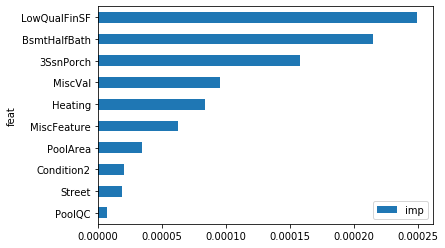

In [41]:
importance = pd.DataFrame({
    'feat':X_train.columns.tolist(),
    'imp':model.feature_importances_
})
# col_order = importance.sort_values("img")
importance.sort_values("imp",ascending=True)[:10].plot.barh(x='feat')

# Resources
- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
- https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f